In [10]:
import os
from typing import TypedDict, List, Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage, SystemMessage
from langchain_huggingface import HuggingFaceEndpoint

In [11]:
class ChatState(TypedDict):
    messages: Annotated[List[BaseMessage], add_messages]

In [12]:
def chat_node(state: ChatState) -> ChatState:
    llm = HuggingFaceEndpoint(
        repo_id="mistralai/Mistral-7B-Instruct-v0.2",
        task="text-generation",
        huggingfacehub_api_token = os.getenv("HUGGINGFACE_API_KEY")
    )

    user_input = input("User: ")

    if user_input.lower() in ["exit", "quit"]:
        return state

    state["messages"].append(HumanMessage(content=user_input))

    response = llm.invoke(state["messages"])

    if isinstance(response, str):
        bot_reply = response

    else:
        bot_reply = response.content

    print(f"Bot: {bot_reply}")

    state["messages"].append(AIMessage(content=bot_reply))

    return state

In [14]:
graph = StateGraph(ChatState)

graph.add_node("chat", chat_node)
graph.add_edge(START, "chat")
graph.add_edge("chat", "chat")

app = graph.compile()


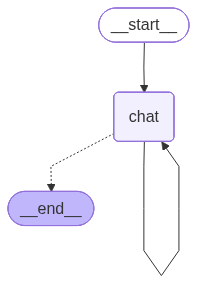

In [15]:
app

In [ ]:
state = {"messages": []}

while True:
    state = app.invoke(state)